In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix   
%matplotlib inline

In [3]:
data_01=pd.read_csv('Claim.csv')
data_02=pd.read_csv('Demographics.csv')
data_03=pd.read_csv('Fraud Data.csv')
data_04=pd.read_csv('Policy.csv')
data_05=pd.read_csv('Vehicle.csv')

In [4]:
data_01.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481


In [5]:
data_02.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India


In [6]:
data_03.head()

,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y


In [7]:
data_04.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007


In [8]:
data_05.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212


In [9]:
print(data_01.shape)
print(data_02.shape)
print(data_03.shape)
print(data_04.shape)
print(data_05.shape)

(28836, 19)
(28836, 10)
(28836, 2)
(28836, 10)
(115344, 3)


In [10]:
# Outer join of data_01, data_02, data_03, data_04, data_05 with 'CustomerID' as key
data_06 = pd.merge(data_01, data_02, on='CustomerID', how='outer')
data_07 = pd.merge(data_06, data_03, on='CustomerID', how='outer')
data_08 = pd.merge(data_07, data_04, on='CustomerID', how='outer')
data_09 = pd.merge(data_08, data_05, on='CustomerID', how='outer')
data_09.shape

(115344, 40)

In [11]:
data_09.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleAttribute,VehicleAttributeDetails
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,VehicleID,Vehicle26917
1,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,VehicleModel,A5
2,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,VehicleYOM,2008
3,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,VehicleMake,Audi
4,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,114,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family,VehicleYOM,2006


In [12]:
# Finding duplicate rows
data_09.duplicated().sum()

0

In [13]:
data_09.iloc[:,0:20].head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013,35
1,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013,35
2,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013,35
3,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013,35
4,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903,36


In [14]:
data_09.iloc[:,20:].head()

,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,ReportedFraud,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleAttribute,VehicleAttributeDetails
0,454776,MALE,JD,armed-forces,movies,56700,-48500,India,N,119121,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,VehicleID,Vehicle26917
1,454776,MALE,JD,armed-forces,movies,56700,-48500,India,N,119121,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,VehicleModel,A5
2,454776,MALE,JD,armed-forces,movies,56700,-48500,India,N,119121,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,VehicleYOM,2008
3,454776,MALE,JD,armed-forces,movies,56700,-48500,India,N,119121,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,VehicleMake,Audi
4,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,N,119122,114,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family,VehicleYOM,2006


In [15]:
data_09.isnull().sum()[data_09.isnull().sum()>0]

InsuredGender    120
Country            8
dtype: int64

In [16]:
# Category of InsuredGender
data_09['InsuredGender'].value_counts()

FEMALE    62576
MALE      52648
Name: InsuredGender, dtype: int64

In [17]:
# Forward fill of InsuredGender
data_09['InsuredGender'].fillna(method='ffill', inplace=True)

# Category of InsuredGender
data_09['InsuredGender'].value_counts()

FEMALE    62644
MALE      52700
Name: InsuredGender, dtype: int64

In [18]:
# Label encoding of InsuredGender  
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_09['InsuredGender'] = le.fit_transform(data_09['InsuredGender'])
data_09['InsuredGender'].value_counts()

0    62644
1    52700
Name: InsuredGender, dtype: int64

In [19]:
data_09['Country'].value_counts()

India    115336
Name: Country, dtype: int64

In [20]:
# Dropping country column and storte the data in a new dataframe called data_10
data_10=data_09.drop('Country',axis=1)

In [21]:
data_10.iloc[:,0:20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115344 entries, 0 to 115343
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   CustomerID             115344 non-null  object
 1   DateOfIncident         115344 non-null  object
 2   TypeOfIncident         115344 non-null  object
 3   TypeOfCollission       115344 non-null  object
 4   SeverityOfIncident     115344 non-null  object
 5   AuthoritiesContacted   115344 non-null  object
 6   IncidentState          115344 non-null  object
 7   IncidentCity           115344 non-null  object
 8   IncidentAddress        115344 non-null  object
 9   IncidentTime           115344 non-null  int64 
 10  NumberOfVehicles       115344 non-null  int64 
 11  PropertyDamage         115344 non-null  object
 12  BodilyInjuries         115344 non-null  int64 
 13  Witnesses              115344 non-null  object
 14  PoliceReport           115344 non-null  object
 15  

In [22]:
data_10.shape

(115344, 39)

In [23]:
data_10.iloc[:,20:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115344 entries, 0 to 115343
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   InsuredZipCode              115344 non-null  int64  
 1   InsuredGender               115344 non-null  int32  
 2   InsuredEducationLevel       115344 non-null  object 
 3   InsuredOccupation           115344 non-null  object 
 4   InsuredHobbies              115344 non-null  object 
 5   CapitalGains                115344 non-null  int64  
 6   CapitalLoss                 115344 non-null  int64  
 7   ReportedFraud               115344 non-null  object 
 8   InsurancePolicyNumber       115344 non-null  int64  
 9   CustomerLoyaltyPeriod       115344 non-null  int64  
 10  DateOfPolicyCoverage        115344 non-null  object 
 11  InsurancePolicyState        115344 non-null  object 
 12  Policy_CombinedSingleLimit  115344 non-null  object 
 13  Policy_Deducti

In [24]:
data_10['VehicleAttribute'].value_counts()

VehicleID       28836
VehicleModel    28836
VehicleYOM      28836
VehicleMake     28836
Name: VehicleAttribute, dtype: int64

In [25]:
# Dropping "vehicleID" from "VehicleAttribute
data_11=data_10[data_10.VehicleAttribute != 'VehicleID']

In [26]:
data_11.shape

(86508, 39)

In [27]:
# Dropping "vehicleModel" from "VehicleAttribute
data_12=data_11[data_11.VehicleAttribute != 'VehicleModel']

In [28]:
data_12.shape

(57672, 39)

In [29]:
data_12.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleAttribute,VehicleAttributeDetails
2,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,VehicleYOM,2008
3,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,VehicleMake,Audi
4,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,114,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family,VehicleYOM,2006
7,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,114,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family,VehicleMake,Audi
10,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,167,2001-02-12,State3,500/1000,617,1373.38,0,wife,VehicleYOM,1999


In [30]:
# Pivot table 
data_13=data_12.pivot(index='CustomerID', columns='VehicleAttribute', values='VehicleAttributeDetails')

In [31]:
data_13.head()

VehicleAttribute,VehicleMake,VehicleYOM
CustomerID,,
Cust10000,Audi,2008
Cust10001,Audi,2006
Cust10002,Volkswagen,1999
Cust10003,Volkswagen,2003
Cust10004,Toyota,2010


In [32]:
# Crating dataframe from data_13
data_14=data_13.reset_index()

In [33]:
data_14.head()

VehicleAttribute,CustomerID,VehicleMake,VehicleYOM
0,Cust10000,Audi,2008
1,Cust10001,Audi,2006
2,Cust10002,Volkswagen,1999
3,Cust10003,Volkswagen,2003
4,Cust10004,Toyota,2010


In [34]:
# Dropping "VehicleAttribute" column and "VehicleAttributeDetails" column from data_12
data_15=data_12.drop(['VehicleAttribute','VehicleAttributeDetails'],axis=1)

In [35]:
data_15.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,ReportedFraud,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship
2,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,N,119121,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family
3,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,N,119121,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family
4,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,N,119122,114,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family
7,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,N,119122,114,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family
10,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,N,119123,167,2001-02-12,State3,500/1000,617,1373.38,0,wife


In [36]:
# Dropping duplicate rows in data_15
data_16=data_15.drop_duplicates()

In [37]:
data_16.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,ReportedFraud,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship
2,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,N,119121,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family
4,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,N,119122,114,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family
10,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,N,119123,167,2001-02-12,State3,500/1000,617,1373.38,0,wife
13,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,N,119124,190,2005-04-11,State2,500/1000,722,1337.60,0,own-child
17,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,N,119125,115,1996-10-25,State2,100/300,500,1353.73,4279863,unmarried


In [38]:
data_16.shape

(28836, 37)

In [39]:
data_14.shape

(28836, 3)

In [40]:
# Joining data_16 and data_14
data_17 = pd.merge(data_16, data_14, on='CustomerID', how='outer')

In [41]:
data_17.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleMake,VehicleYOM
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,Audi,2008
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,114,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family,Audi,2006
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,167,2001-02-12,State3,500/1000,617,1373.38,0,wife,Volkswagen,1999
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,190,2005-04-11,State2,500/1000,722,1337.60,0,own-child,Volkswagen,2003
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,115,1996-10-25,State2,100/300,500,1353.73,4279863,unmarried,Toyota,2010


In [42]:
# Checking any duplicate columns in data_17
data_17.columns.duplicated().sum()

0

In [43]:
data_17.shape

(28836, 39)

In [44]:
data_17['VehicleMake'].value_counts()

Saab          2415
Suburu        2313
Nissan        2300
Dodge         2263
Chevrolet     2174
Ford          2158
Accura        2099
BMW           2073
Toyota        1981
Volkswagen    1960
Audi          1952
Jeep          1946
Mercedes      1659
Honda         1493
???             50
Name: VehicleMake, dtype: int64

In [45]:
# Checking missing values in "data_17" dataframe 
data_17.isnull().sum()[data_17.isnull().sum()>0]

Series([], dtype: int64)

In [46]:
# Replacing "???" with forward fill in "VehicleMake" column 
data_17['VehicleMake'].replace('???', np.nan, inplace=True)
data_17['VehicleMake'].fillna(method='ffill', inplace=True)

# Shape of data_17
data_17.shape

(28836, 39)

In [47]:
data_17['VehicleMake'].value_counts()

Saab          2416
Suburu        2316
Nissan        2301
Dodge         2266
Chevrolet     2179
Ford          2161
Accura        2102
BMW           2077
Toyota        1990
Volkswagen    1964
Audi          1956
Jeep          1949
Mercedes      1661
Honda         1498
Name: VehicleMake, dtype: int64

In [48]:
# Label encoding of 'VehicleMake' column in data_17
data_17['VehicleMake']= le.fit_transform(data_17['VehicleMake']) 
data_17.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleMake,VehicleYOM
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,49,1998-10-25,State1,100/300,1000,1632.73,0,not-in-family,1,2008
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,114,2000-11-15,State1,100/300,1000,1255.19,0,not-in-family,1,2006
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,167,2001-02-12,State3,500/1000,617,1373.38,0,wife,13,1999
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,190,2005-04-11,State2,500/1000,722,1337.60,0,own-child,13,2003
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,115,1996-10-25,State2,100/300,500,1353.73,4279863,unmarried,12,2010


In [49]:
# Skewness of "VehicleMake" column
data_17['VehicleMake'].skew()

-0.0201640891070668

In [50]:
data_17['VehicleYOM'].value_counts()

2007    1730
2004    1691
2010    1686
2006    1680
2008    1655
2009    1655
2005    1653
2003    1606
2011    1581
2002    1551
2000    1548
1999    1521
2001    1458
2012    1357
1998    1319
2013    1271
1997    1151
2014     889
1996     851
1995     555
2015     428
Name: VehicleYOM, dtype: int64

In [51]:
data_17['VehicleYOM']

0        2008
1        2006
2        1999
3        2003
4        2010
         ... 
28831    2007
28832    2003
28833    2004
28834    2004
28835    2007
Name: VehicleYOM, Length: 28836, dtype: object

In [52]:
# Label encoding of 'VehicleYOM' column in data_17
data_17['VehicleYOM']= le.fit_transform(data_17['VehicleYOM'])
data_17['VehicleYOM']

0        13
1        11
2         4
3         8
4        15
         ..
28831    12
28832     8
28833     9
28834     9
28835    12
Name: VehicleYOM, Length: 28836, dtype: int32

In [53]:
# Skewness of "VehicleYOM" column
data_17['VehicleYOM'].skew()

-0.04756947605484407

In [54]:
data_17['CustomerID'].value_counts()

Cust10000    1
Cust33397    1
Cust33356    1
Cust33354    1
Cust33353    1
            ..
Cust21600    1
Cust2160     1
Cust21599    1
Cust21598    1
Cust9999     1
Name: CustomerID, Length: 28836, dtype: int64

In [55]:
# Checking unique values in "CustomerID" column
data_17['CustomerID'].nunique()

28836

In [56]:
# Dropping "CustomerID" column
data_17=data_17.drop('CustomerID',axis=1)

In [57]:
data_17['DateOfIncident'].value_counts()

2015-01-10    661
2015-01-18    657
2015-02-17    648
2015-01-17    647
2015-01-09    646
             ... 
2015-03-08      2
2015-03-07      1
2015-03-12      1
2015-03-10      1
2015-03-14      1
Name: DateOfIncident, Length: 72, dtype: int64

In [58]:
data_17['DateOfIncident'].nunique()

72

In [59]:
# Converting "DateOfIncident" column to datetime format
data_17['DateOfIncident']=pd.to_datetime(data_17['DateOfIncident'])

In [60]:
data_17['year_of_incident']=data_17['DateOfIncident'].dt.year

In [61]:
data_17['month_of_incident']=data_17['DateOfIncident'].dt.month

In [62]:
data_17['day_of_incident']=data_17['DateOfIncident'].dt.day

In [63]:
data_17.shape

(28836, 41)

In [64]:
data_17.head()

,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleMake,VehicleYOM,year_of_incident,month_of_incident,day_of_incident
0,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,...,100/300,1000,1632.73,0,not-in-family,1,13,2015,2,3
1,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,...,100/300,1000,1255.19,0,not-in-family,1,11,2015,2,2
2,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,...,500/1000,617,1373.38,0,wife,13,4,2015,1,15
3,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,...,500/1000,722,1337.60,0,own-child,13,8,2015,1,19
4,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,...,100/300,500,1353.73,4279863,unmarried,12,15,2015,1,9


In [65]:
# Extraction of day of week from "DateOfIncident" column
data_17['day_of_week_of_incident']=data_17['DateOfIncident'].dt.dayofweek

In [66]:
# Checking whether the day is weekend or not and store the result in a new column called "weekend" and create a new dataframe called data_18

data_17['weekend_of_incident']=data_17['day_of_week_of_incident'].apply(lambda x: 1 if x>4 else 0)

data_18=data_17

data_18.head()


,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,...,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleMake,VehicleYOM,year_of_incident,month_of_incident,day_of_incident,day_of_week_of_incident,weekend_of_incident
0,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,...,1632.73,0,not-in-family,1,13,2015,2,3,1,0
1,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,...,1255.19,0,not-in-family,1,11,2015,2,2,0,0
2,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,...,1373.38,0,wife,13,4,2015,1,15,3,0
3,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,...,1337.60,0,own-child,13,8,2015,1,19,0,0
4,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,...,1353.73,4279863,unmarried,12,15,2015,1,9,4,0


In [67]:
data_18['year_of_incident'].value_counts()

2015    28836
Name: year_of_incident, dtype: int64

In [68]:
# Dropping "DateOfIncident" column
data_18=data_18.drop('DateOfIncident',axis=1)

In [69]:
# Dropping "year_of_incident" column
data_18=data_18.drop('year_of_incident',axis=1)

In [70]:
data_18['TypeOfIncident'].value_counts()

Multi-vehicle Collision     11966
Single Vehicle Collision    11677
Vehicle Theft                2685
Parked Car                   2508
Name: TypeOfIncident, dtype: int64

In [71]:
# one hot encoding of "TypeOfIncident" column with "drop_first=True"
data_19=pd.get_dummies(data_18,columns=['TypeOfIncident'],drop_first=True)
data_19.head()

,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,...,InsuredRelationship,VehicleMake,VehicleYOM,month_of_incident,day_of_incident,day_of_week_of_incident,weekend_of_incident,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft
0,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,...,not-in-family,1,13,2,3,1,0,0,0,0
1,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,...,not-in-family,1,11,2,2,0,0,0,0,0
2,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,...,wife,13,4,1,15,3,0,0,1,0
3,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,...,own-child,13,8,1,19,0,0,0,1,0
4,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,...,unmarried,12,15,1,9,4,0,0,1,0


In [72]:
data_19['TypeOfCollission'].value_counts()

Rear Collision     8561
Side Collision     7867
Front Collision    7246
?                  5162
Name: TypeOfCollission, dtype: int64

In [73]:
# Filling "?" values with null values in "TypeOfCollission" column
data_19['TypeOfCollission']=data_19['TypeOfCollission'].replace('?',np.nan)

In [74]:
data_19['TypeOfCollission'].value_counts()

Rear Collision     8561
Side Collision     7867
Front Collision    7246
Name: TypeOfCollission, dtype: int64

In [75]:
# Forward fill null values in "TypeOfCollission" column
data_19 = data_19.fillna(method="ffill")

In [76]:
data_19['TypeOfCollission'].value_counts()

Rear Collision     10400
Side Collision      9640
Front Collision     8796
Name: TypeOfCollission, dtype: int64

In [77]:
# One hot encoding of "TypeOfCollission" column with "drop_first=True"
data_19=pd.get_dummies(data_19,columns=['TypeOfCollission'],drop_first=True)

In [78]:
data_19.head()

,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,...,VehicleYOM,month_of_incident,day_of_incident,day_of_week_of_incident,weekend_of_incident,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision
0,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,...,13,2,3,1,0,0,0,0,0,1
1,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,...,11,2,2,0,0,0,0,0,0,1
2,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,...,4,1,15,3,0,0,1,0,0,1
3,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,...,8,1,19,0,0,0,1,0,0,1
4,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,...,15,1,9,4,0,0,1,0,1,0


In [79]:
data_19['SeverityOfIncident'].value_counts()

Minor Damage      10400
Total Loss         8218
Major Damage       7671
Trivial Damage     2547
Name: SeverityOfIncident, dtype: int64

In [80]:
# One hot encoding of "SeverityOfIncident" column
data_20=pd.get_dummies(data_19,columns=['SeverityOfIncident'],drop_first=True)

In [81]:
data_20.head()

,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,...,day_of_week_of_incident,weekend_of_incident,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage
0,Police,State7,City1,Location 1311,17,3,?,1,0,?,...,1,0,0,0,0,0,1,0,1,0
1,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,...,0,0,0,0,0,0,1,0,1,0
2,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,...,3,0,0,1,0,0,1,1,0,0
3,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,...,0,0,0,1,0,0,1,1,0,0
4,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,...,4,0,0,1,0,1,0,1,0,0


In [82]:
data_20['AuthoritiesContacted'].value_counts()

Police       8324
Fire         6518
Ambulance    5732
Other        5570
None         2692
Name: AuthoritiesContacted, dtype: int64

In [83]:
# Label encoding of "AuthoritiesContacted" column
data_20['AuthoritiesContacted']= le.fit_transform(data_20['AuthoritiesContacted']) 

In [84]:
data_21=data_20
data_21.head()

,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,...,day_of_week_of_incident,weekend_of_incident,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage
0,4,State7,City1,Location 1311,17,3,?,1,0,?,...,1,0,0,0,0,0,1,0,1,0
1,4,State7,City5,Location 1311,10,3,YES,2,1,YES,...,0,0,0,0,0,0,1,0,1,0
2,3,State8,City6,Location 2081,22,1,YES,2,3,NO,...,3,0,0,1,0,0,1,1,0,0
3,3,State9,City6,Location 2081,22,1,YES,2,3,NO,...,0,0,0,1,0,0,1,1,0,0
4,1,State8,City6,Location 1695,10,1,NO,2,1,YES,...,4,0,0,1,0,1,0,1,0,0


In [85]:
data_21['IncidentState'].value_counts()

State5    7886
State7    7168
State9    6161
State8    3181
State4    3029
State6     810
State3     601
Name: IncidentState, dtype: int64

In [86]:
# Label encoding of "IncidentState" column
data_21['IncidentState']= le.fit_transform(data_21['IncidentState']) 
data_22=data_21

In [87]:
data_22['IncidentState']

0        4
1        4
2        5
3        6
4        5
        ..
28831    6
28832    5
28833    6
28834    6
28835    5
Name: IncidentState, Length: 28836, dtype: int32

In [88]:
data_22.head()

,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,...,day_of_week_of_incident,weekend_of_incident,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage
0,4,4,City1,Location 1311,17,3,?,1,0,?,...,1,0,0,0,0,0,1,0,1,0
1,4,4,City5,Location 1311,10,3,YES,2,1,YES,...,0,0,0,0,0,0,1,0,1,0
2,3,5,City6,Location 2081,22,1,YES,2,3,NO,...,3,0,0,1,0,0,1,1,0,0
3,3,6,City6,Location 2081,22,1,YES,2,3,NO,...,0,0,0,1,0,0,1,1,0,0
4,1,5,City6,Location 1695,10,1,NO,2,1,YES,...,4,0,0,1,0,1,0,1,0,0


In [89]:
data_22['IncidentCity'].value_counts()

City2    4486
City1    4374
City4    4311
City7    4216
City3    4073
City5    3698
City6    3678
Name: IncidentCity, dtype: int64

In [90]:
# Label encoding of "IncidentCity" column
data_22['IncidentCity']= le.fit_transform(data_22['IncidentCity']) 
data_23=data_22

In [91]:
data_23.shape

(28836, 46)

In [92]:
data_23['IncidentAddress'].value_counts()

Location 1341    73
Location 1254    72
Location 1227    71
Location 2006    70
Location 1136    68
                 ..
Location 1359    10
Location 1464    10
Location 2072     9
Location 1043     9
Location 1555     9
Name: IncidentAddress, Length: 1000, dtype: int64

In [93]:
#Dropping "IncidentAddress" column
data_23=data_23.drop('IncidentAddress',axis=1)

In [94]:
data_23.head()

,AuthoritiesContacted,IncidentState,IncidentCity,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,...,day_of_week_of_incident,weekend_of_incident,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage
0,4,4,0,17,3,?,1,0,?,65501,...,1,0,0,0,0,0,1,0,1,0
1,4,4,4,10,3,YES,2,1,YES,61382,...,0,0,0,0,0,0,1,0,1,0
2,3,5,5,22,1,YES,2,3,NO,66755,...,3,0,0,1,0,0,1,1,0,0
3,3,6,5,22,1,YES,2,3,NO,66243,...,0,0,0,1,0,0,1,1,0,0
4,1,5,5,10,1,NO,2,1,YES,53544,...,4,0,0,1,0,1,0,1,0,0


In [95]:
data_23['IncidentTime'].value_counts()

 16    1616
 17    1615
 6     1564
 15    1541
 14    1461
 5     1434
 13    1420
 18    1419
 4     1406
 12    1363
 7     1331
 11    1286
 19    1280
 8     1251
 3     1232
 9     1210
 10    1165
 20    1153
 21     971
 22     809
 2      713
 1      648
 23     526
 0      391
-5       31
Name: IncidentTime, dtype: int64

In [96]:
# Dropping "-5" values in "IncidentTime" column
data_23=data_23[data_23['IncidentTime']!=-5]

In [97]:
# Checking if there is any negative value in "IncidentTime" column
data_23[data_23['IncidentTime']<0]

,AuthoritiesContacted,IncidentState,IncidentCity,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,...,day_of_week_of_incident,weekend_of_incident,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage


In [98]:
data_23['IncidentTime']

0        17
1        10
2        22
3        22
4        10
         ..
28831     3
28832    17
28833     1
28834     1
28835     9
Name: IncidentTime, Length: 28805, dtype: int64

In [99]:
# Skewness of "IncidentTime" column
data_23['IncidentTime'].skew()

-0.04547340444705748

In [100]:
# data 23 shape
data_23.shape

(28805, 45)

In [101]:
# data 24 shape
data_24=data_23

In [102]:
data_24.head()

,AuthoritiesContacted,IncidentState,IncidentCity,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,...,day_of_week_of_incident,weekend_of_incident,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage
0,4,4,0,17,3,?,1,0,?,65501,...,1,0,0,0,0,0,1,0,1,0
1,4,4,4,10,3,YES,2,1,YES,61382,...,0,0,0,0,0,0,1,0,1,0
2,3,5,5,22,1,YES,2,3,NO,66755,...,3,0,0,1,0,0,1,1,0,0
3,3,6,5,22,1,YES,2,3,NO,66243,...,0,0,0,1,0,0,1,1,0,0
4,1,5,5,10,1,NO,2,1,YES,53544,...,4,0,0,1,0,1,0,1,0,0


In [103]:
data_24['NumberOfVehicles'].value_counts()

1    16149
3     9702
2     2275
4      679
Name: NumberOfVehicles, dtype: int64

In [104]:
# Skewness of "NumberOfVehicles" column
data_24['NumberOfVehicles'].skew()

0.5092464786703402

In [105]:
data_24.head()

,AuthoritiesContacted,IncidentState,IncidentCity,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,...,day_of_week_of_incident,weekend_of_incident,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage
0,4,4,0,17,3,?,1,0,?,65501,...,1,0,0,0,0,0,1,0,1,0
1,4,4,4,10,3,YES,2,1,YES,61382,...,0,0,0,0,0,0,1,0,1,0
2,3,5,5,22,1,YES,2,3,NO,66755,...,3,0,0,1,0,0,1,1,0,0
3,3,6,5,22,1,YES,2,3,NO,66243,...,0,0,0,1,0,0,1,1,0,0
4,1,5,5,10,1,NO,2,1,YES,53544,...,4,0,0,1,0,1,0,1,0,0


In [106]:
data_24['PropertyDamage'].value_counts()

?      10450
NO      9674
YES     8681
Name: PropertyDamage, dtype: int64

In [107]:
data_24['PropertyDamage']=data_24['PropertyDamage'].replace('?',np.nan)

In [108]:
data_24['PropertyDamage'].value_counts()

NO     9674
YES    8681
Name: PropertyDamage, dtype: int64

In [109]:
# Backward fill in "PropertyDamage" column
data_24 = data_24.fillna(method="bfill")

In [110]:
data_24['PropertyDamage'].value_counts()

NO     15053
YES    13752
Name: PropertyDamage, dtype: int64

In [111]:
# One hot encoding of "PropertyDamage" column with "drop_first=True"
data_24=pd.get_dummies(data_24,columns=['PropertyDamage'],drop_first=True)

In [112]:
data_24.head()

,AuthoritiesContacted,IncidentState,IncidentCity,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,...,weekend_of_incident,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,PropertyDamage_YES
0,4,4,0,17,3,1,0,?,65501,13417,...,0,0,0,0,0,1,0,1,0,1
1,4,4,4,10,3,2,1,YES,61382,15560,...,0,0,0,0,0,1,0,1,0,1
2,3,5,5,22,1,2,3,NO,66755,11630,...,0,0,1,0,0,1,1,0,0,1
3,3,6,5,22,1,2,3,NO,66243,12003,...,0,0,1,0,0,1,1,0,0,1
4,1,5,5,10,1,2,1,YES,53544,8829,...,0,0,1,0,1,0,1,0,0,0


In [113]:
data_24['BodilyInjuries'].value_counts()

1    11058
0     9076
2     8671
Name: BodilyInjuries, dtype: int64

In [114]:
data_24['Witnesses'].value_counts()

2               8438
1               8338
0               6119
3               5864
MISSINGVALUE      46
Name: Witnesses, dtype: int64

In [115]:
# Replacing "MISSINGVALUE" values with null values in "Witnesses" column
data_24['Witnesses']=data_24['Witnesses'].replace('MISSINGVALUE',np.nan)

# Forward fill null values in "Witnesses" column
data_24 = data_24.fillna(method="ffill")

data_24['Witnesses'].value_counts()

2    8456
1    8349
0    6125
3    5875
Name: Witnesses, dtype: int64

In [116]:
data_25=data_24

In [117]:
data_25['Witnesses']

0        0
1        1
2        3
3        3
4        1
        ..
28831    3
28832    2
28833    0
28834    0
28835    3
Name: Witnesses, Length: 28805, dtype: object

In [118]:
# Convert "Witnesses" column to int
data_25['Witnesses']=data_25['Witnesses'].astype(int)

In [119]:
data_25['Witnesses'].dtype

dtype('int32')

In [120]:
data_25['PoliceReport'].value_counts()

NO     9882
?      9796
YES    9127
Name: PoliceReport, dtype: int64

In [121]:
data_25['PoliceReport']=data_25['PoliceReport'].replace('?',np.nan)

In [122]:
# Backward fill in "PoliceReport" column
data_25 = data_25.fillna(method="bfill")

In [123]:
data_25['PoliceReport'].value_counts()

NO     15084
YES    13721
Name: PoliceReport, dtype: int64

In [124]:
# One hot encoding of "PoliceReport" column with "drop_first=True"
data_25=pd.get_dummies(data_25,columns=['PoliceReport'],drop_first=True)

In [125]:
data_25['AmountOfTotalClaim'].value_counts()

MISSEDDATA    19
6820          12
5400           8
60600          8
55000          7
              ..
37863          1
33412          1
62879          1
54465          1
55830          1
Name: AmountOfTotalClaim, Length: 21976, dtype: int64

In [126]:
data_25['AmountOfTotalClaim']

0        65501
1        61382
2        66755
3        66243
4        53544
         ...  
28831     6590
28832    74547
28833    55305
28834    55830
28835    68969
Name: AmountOfTotalClaim, Length: 28805, dtype: object

In [127]:
# Replacing "MISSEDDATA" values in "AmountOfTotalClaim" column with null values
data_25['AmountOfTotalClaim']=data_25['AmountOfTotalClaim'].replace('MISSEDDATA',np.nan)

# Forward fill null values in "AmountOfTotalClaim" column
data_25 = data_25.fillna(method="ffill")

data_25['AmountOfTotalClaim']

0        65501
1        61382
2        66755
3        66243
4        53544
         ...  
28831     6590
28832    74547
28833    55305
28834    55830
28835    68969
Name: AmountOfTotalClaim, Length: 28805, dtype: object

In [128]:
data_26=data_25

In [129]:
# Converting "AmountOfTotalClaim" column to int type
data_26['AmountOfTotalClaim']=data_26['AmountOfTotalClaim'].astype(int)

150
114920
52304.830897413645
58359.0
0    6820
Name: AmountOfTotalClaim, dtype: int32
-0.7825028613726829


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AmountOfTotalClaim', ylabel='Density'>

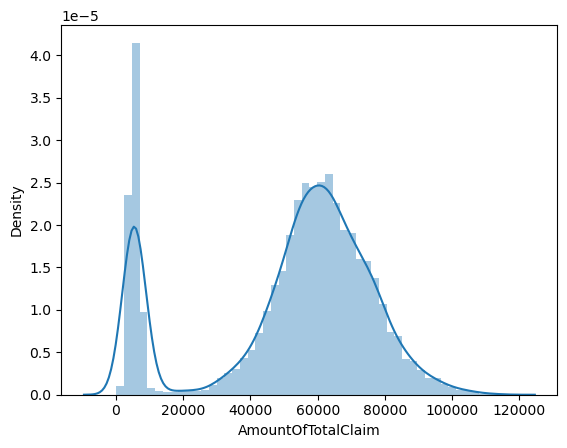

In [130]:
# Lowest value of "AmountOfTotalClaim" column
print(data_26['AmountOfTotalClaim'].min())

# Highest value of "AmountOfTotalClaim" column
print(data_26['AmountOfTotalClaim'].max())

# Mean value of "AmountOfTotalClaim" column
print(data_26['AmountOfTotalClaim'].mean())

# Median value of "AmountOfTotalClaim" column
print(data_26['AmountOfTotalClaim'].median())

# Mode value of "AmountOfTotalClaim" column
print(data_26['AmountOfTotalClaim'].mode())

# Skewness of "AmountOfTotalClaim" column
print(data_26['AmountOfTotalClaim'].skew())

# Distribution of "AmountOfTotalClaim" column
sns.distplot(data_26['AmountOfTotalClaim'])

In [131]:
# Treatment of outlier in AmountOfTotalClaim column 
upper_limit = data_26['AmountOfTotalClaim'].mean() + 1*data_26['AmountOfTotalClaim'].std()
lower_limit = data_26['AmountOfTotalClaim'].mean() - 1*data_26['AmountOfTotalClaim'].std()

data_26['AmountOfTotalClaim'] = np.where(
    data_26['AmountOfTotalClaim']>upper_limit,
    upper_limit,
    np.where(
        data_26['AmountOfTotalClaim']<lower_limit,
        lower_limit,
        data_26['AmountOfTotalClaim']
    )
)

# skewness 
print(data_26['AmountOfTotalClaim'].skew())

-0.4698590288394506


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AmountOfTotalClaim', ylabel='Density'>

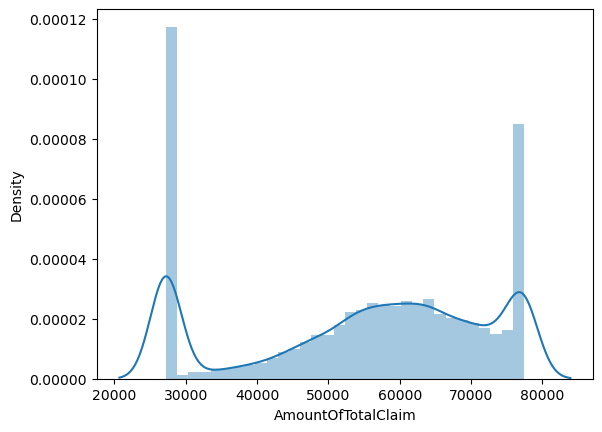

In [132]:
# Distribution of "AmountOfTotalClaim" column
sns.distplot(data_26['AmountOfTotalClaim'])

In [133]:
# Mean value of "AmountOfTotalClaim" column
print(data_26['AmountOfTotalClaim'].mean())

# Median value of "AmountOfTotalClaim" column
print(data_26['AmountOfTotalClaim'].median())

# Mode value of "AmountOfTotalClaim" column
print(data_26['AmountOfTotalClaim'].mode())

55309.638343712984
58359.0
0    27204.150929
Name: AmountOfTotalClaim, dtype: float64


In [134]:
data_26.head()

,AuthoritiesContacted,IncidentState,IncidentCity,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,...,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,PropertyDamage_YES,PoliceReport_YES
0,4,4,0,17,3,1,0,65501.0,13417,6071,...,0,0,0,0,1,0,1,0,1,1
1,4,4,4,10,3,2,1,61382.0,15560,5919,...,0,0,0,0,1,0,1,0,1,1
2,3,5,5,22,1,2,3,66755.0,11630,11630,...,0,1,0,0,1,1,0,0,1,0
3,3,6,5,22,1,2,3,66243.0,12003,12003,...,0,1,0,0,1,1,0,0,1,0
4,1,5,5,10,1,2,1,53544.0,8829,7234,...,0,1,0,1,0,1,0,0,0,1


In [135]:
data_26['AmountOfInjuryClaim'].value_counts()

0        68
480      51
640      34
580      19
740      17
         ..
14521     1
17649     1
14398     1
5925      1
14699     1
Name: AmountOfInjuryClaim, Length: 11955, dtype: int64

In [136]:
data_26['AmountOfInjuryClaim']

0        13417
1        15560
2        11630
3        12003
4         8829
         ...  
28831      870
28832    14699
28833     7043
28834     7059
28835    12075
Name: AmountOfInjuryClaim, Length: 28805, dtype: int64

In [137]:
# Lowest value of "AmountOfInjuryClaim" column
data_26['AmountOfInjuryClaim'].min()

0

In [138]:
# Highest value of "AmountOfInjuryClaim" column
data_26['AmountOfInjuryClaim'].max()

21450

In [139]:
# Adding 1 to each value of "AmountOfInjuryClaim" column
data_26['AmountOfInjuryClaim']=data_26['AmountOfInjuryClaim']+1

In [140]:
data_26['AmountOfInjuryClaim']

0        13418
1        15561
2        11631
3        12004
4         8830
         ...  
28831      871
28832    14700
28833     7044
28834     7060
28835    12076
Name: AmountOfInjuryClaim, Length: 28805, dtype: int64

In [141]:
data_26['AmountOfInjuryClaim'].value_counts()

1        68
481      51
641      34
581      19
741      17
         ..
14522     1
17650     1
14399     1
5926      1
14700     1
Name: AmountOfInjuryClaim, Length: 11955, dtype: int64

In [142]:
# Log transformation  of "AmountOfInjuryClaim" column of data_26 
data_26['AmountOfInjuryClaim']=np.log(data_26['AmountOfInjuryClaim'])

In [143]:
# Lowest value of "AmountOfInjuryClaim" column
data_26['AmountOfInjuryClaim'].min()

0.0

In [144]:
# Highest value of "AmountOfInjuryClaim" column
data_26['AmountOfInjuryClaim'].max()

9.973526543316103

In [145]:
data_26['AmountOfInjuryClaim']

0        9.504352
1        9.652523
2        9.361429
3        9.392995
4        9.085910
           ...   
28831    6.769642
28832    9.595603
28833    8.859931
28834    8.862200
28835    9.398975
Name: AmountOfInjuryClaim, Length: 28805, dtype: float64

In [146]:
# Skewness of "AmountOfInjuryClaim" column
data_26['AmountOfInjuryClaim'].skew()

-2.080503942198823

In [147]:
# Treatment of outlier in AmountOfInjuryClaim column 
upper_limit = data_26['AmountOfInjuryClaim'].mean() + 1*data_26['AmountOfInjuryClaim'].std()
lower_limit = data_26['AmountOfInjuryClaim'].mean() - 1*data_26['AmountOfInjuryClaim'].std()

data_26['AmountOfInjuryClaim'] = np.where(
    data_26['AmountOfInjuryClaim']>upper_limit,
    upper_limit,
    np.where(
        data_26['AmountOfInjuryClaim']<lower_limit,
        lower_limit,
        data_26['AmountOfInjuryClaim']
    )
)

# skewness 
print(data_26['AmountOfInjuryClaim'].skew())

-0.7902755414602742


In [148]:
# Treatment of outlier in AmountOfInjuryClaim column 
upper_limit = data_26['AmountOfInjuryClaim'].mean() + 1*data_26['AmountOfInjuryClaim'].std()
lower_limit = data_26['AmountOfInjuryClaim'].mean() - 1*data_26['AmountOfInjuryClaim'].std()

data_26['AmountOfInjuryClaim'] = np.where(
    data_26['AmountOfInjuryClaim']>upper_limit,
    upper_limit,
    np.where(
        data_26['AmountOfInjuryClaim']<lower_limit,
        lower_limit,
        data_26['AmountOfInjuryClaim']
    )
)

# skewness 
print(data_26['AmountOfInjuryClaim'].skew())

-0.4409194388173015


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AmountOfInjuryClaim', ylabel='Density'>

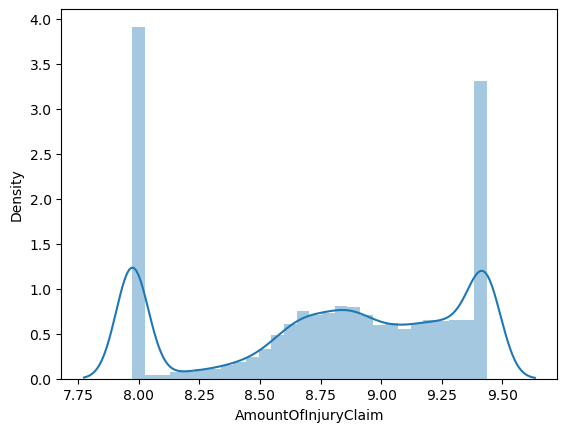

In [149]:
# Distribution of "AmountOfInjuryClaim" column
sns.distplot(data_26['AmountOfInjuryClaim'])

In [150]:
data_26['AmountOfPropertyClaim']

0         6071
1         5919
2        11630
3        12003
4         7234
         ...  
28831     1078
28832     7875
28833     7043
28834     7059
28835     6038
Name: AmountOfPropertyClaim, Length: 28805, dtype: int64

In [151]:
# Lowest value of "AmountOfPropertyClaim" column
data_26['AmountOfPropertyClaim'].min()

0

In [152]:
# Highest value of "AmountOfPropertyClaim" column
data_26['AmountOfPropertyClaim'].max()

23670

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AmountOfPropertyClaim', ylabel='Density'>

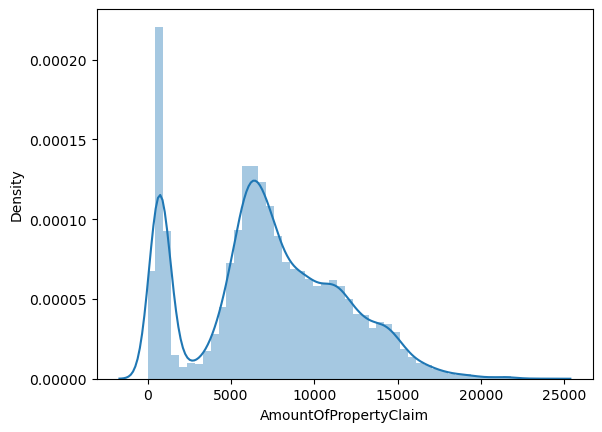

In [153]:
# Distribution of "AmountOfPropertyClaim" column
sns.distplot(data_26['AmountOfPropertyClaim'])

In [154]:
# Adding 1 to each value of "AmountOfPropertyClaim" column
data_26['AmountOfPropertyClaim']=data_26['AmountOfPropertyClaim']+1

In [155]:
# Value counts of "AmountOfPropertyClaim" column
data_26['AmountOfPropertyClaim'].value_counts()

1        35
581      17
607      16
579      16
507      15
         ..
10945     1
7118      1
4954      1
14663     1
13132     1
Name: AmountOfPropertyClaim, Length: 11781, dtype: int64

In [156]:
# Log transformation  of "AmountOfPropertyClaim" column of data_26
data_26['AmountOfPropertyClaim']=np.log(data_26['AmountOfPropertyClaim'])

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AmountOfPropertyClaim', ylabel='Density'>

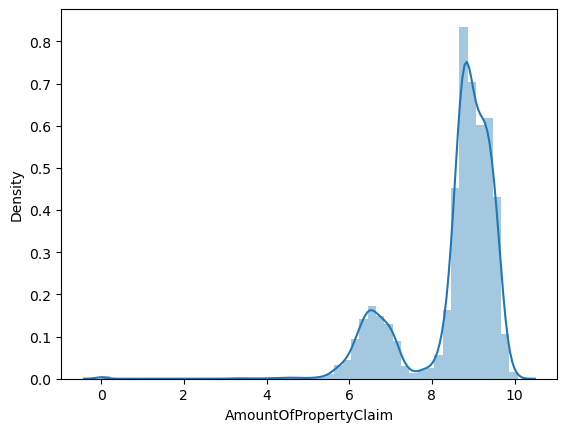

In [157]:
# Distribution of "AmountOfPropertyClaim" column
sns.distplot(data_26['AmountOfPropertyClaim'])

In [158]:
# Lowest value of "AmountOfPropertyClaim" column
data_26['AmountOfPropertyClaim'].min()

0.0

In [159]:
# Highest value of "AmountOfPropertyClaim" column
data_26['AmountOfPropertyClaim'].max()

10.07200594918639

In [160]:
# Skewness of "AmountOfPropertyClaim" column
data_26['AmountOfPropertyClaim'].skew()

-1.8161924363206554

In [161]:
upper_limit = data_26['AmountOfPropertyClaim'].mean() + 2*data_26['AmountOfPropertyClaim'].std()
lower_limit = data_26['AmountOfPropertyClaim'].mean() - 2*data_26['AmountOfPropertyClaim'].std()

data_26['AmountOfPropertyClaim'] = np.where(
    data_26['AmountOfPropertyClaim']>upper_limit,
    upper_limit,
    np.where(
        data_26['AmountOfPropertyClaim']<lower_limit,
        lower_limit,
        data_26['AmountOfPropertyClaim']
    )
)

# skewwness
print(data_26['AmountOfPropertyClaim'].skew())

-1.2066064617143082


In [162]:
upper_limit = data_26['AmountOfPropertyClaim'].mean() + 2*data_26['AmountOfPropertyClaim'].std()
lower_limit = data_26['AmountOfPropertyClaim'].mean() - 2*data_26['AmountOfPropertyClaim'].std()

data_26['AmountOfPropertyClaim'] = np.where(
    data_26['AmountOfPropertyClaim']>upper_limit,
    upper_limit,
    np.where(
        data_26['AmountOfPropertyClaim']<lower_limit,
        lower_limit,
        data_26['AmountOfPropertyClaim']
    )
)

# skewwness
print(data_26['AmountOfPropertyClaim'].skew())

-1.149683858774989


In [163]:
upper_limit = data_26['AmountOfPropertyClaim'].mean() + 1.5*data_26['AmountOfPropertyClaim'].std()
lower_limit = data_26['AmountOfPropertyClaim'].mean() - 1.5*data_26['AmountOfPropertyClaim'].std()

data_26['AmountOfPropertyClaim'] = np.where(
    data_26['AmountOfPropertyClaim']>upper_limit,
    upper_limit,
    np.where(
        data_26['AmountOfPropertyClaim']<lower_limit,
        lower_limit,
        data_26['AmountOfPropertyClaim']
    )
)

# skewwness
print(data_26['AmountOfPropertyClaim'].skew())

-0.9324127921157834


In [164]:
upper_limit = data_26['AmountOfPropertyClaim'].mean() + 1*data_26['AmountOfPropertyClaim'].std()
lower_limit = data_26['AmountOfPropertyClaim'].mean() - 1*data_26['AmountOfPropertyClaim'].std()

data_26['AmountOfPropertyClaim'] = np.where(
    data_26['AmountOfPropertyClaim']>upper_limit,
    upper_limit,
    np.where(
        data_26['AmountOfPropertyClaim']<lower_limit,
        lower_limit,
        data_26['AmountOfPropertyClaim']
    )
)

# skewwness
print(data_26['AmountOfPropertyClaim'].skew())

-0.5368390177572072


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AmountOfPropertyClaim', ylabel='Density'>

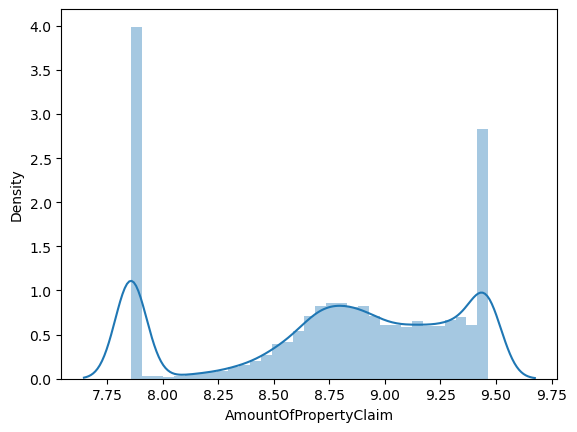

In [165]:
# Distribution of "AmountOfPropertyClaim" column
sns.distplot(data_26['AmountOfPropertyClaim'])

In [166]:
data_26['AmountOfVehicleDamage'].value_counts()

2560     19
5040     12
28000    11
3933      8
3600      8
         ..
30921     1
46074     1
44081     1
35027     1
41183     1
Name: AmountOfVehicleDamage, Length: 20027, dtype: int64

In [167]:
data_26['AmountOfVehicleDamage']

0        46013
1        39903
2        43495
3        42237
4        37481
         ...  
28831     4642
28832    51973
28833    41219
28834    41712
28835    50856
Name: AmountOfVehicleDamage, Length: 28805, dtype: int64

In [168]:
# Highest value of "AmountOfVehicleDamage" column
data_26['AmountOfVehicleDamage'].max()

79560

In [169]:
# Lowest value of "AmountOfVehicleDamage" column
data_26['AmountOfVehicleDamage'].min()

109

In [170]:
# Skewness of "AmountOfVehicleDamage" column
data_26['AmountOfVehicleDamage'].skew()

-0.8199427853372846

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AmountOfVehicleDamage', ylabel='Density'>

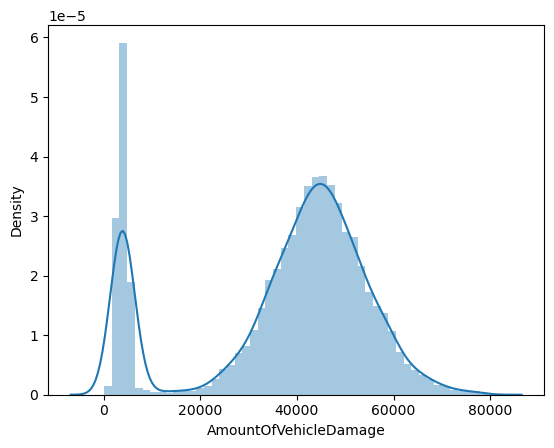

In [171]:
# Distribution of "AmountOfVehicleDamage" column
sns.distplot(data_26['AmountOfVehicleDamage'])

In [172]:
upper_limit = data_26['AmountOfVehicleDamage'].mean() + 3*data_26['AmountOfVehicleDamage'].std()
lower_limit = data_26['AmountOfVehicleDamage'].mean() - 3*data_26['AmountOfVehicleDamage'].std()

data_26['AmountOfVehicleDamage'] = np.where(
    data_26['AmountOfVehicleDamage']>upper_limit,
    upper_limit,
    np.where(
        data_26['AmountOfVehicleDamage']<lower_limit,
        lower_limit,
        data_26['AmountOfVehicleDamage']
    )
)

# skewwness
print(data_26['AmountOfVehicleDamage'].skew())

-0.8199427853372846


In [173]:
upper_limit = data_26['AmountOfVehicleDamage'].mean() + 2*data_26['AmountOfVehicleDamage'].std()
lower_limit = data_26['AmountOfVehicleDamage'].mean() - 2*data_26['AmountOfVehicleDamage'].std()

data_26['AmountOfVehicleDamage'] = np.where(
    data_26['AmountOfVehicleDamage']>upper_limit,
    upper_limit,
    np.where(
        data_26['AmountOfVehicleDamage']<lower_limit,
        lower_limit,
        data_26['AmountOfVehicleDamage']
    )
)

# skewwness
print(data_26['AmountOfVehicleDamage'].skew())

-0.8255696154342592


In [174]:
upper_limit = data_26['AmountOfVehicleDamage'].mean() + 1*data_26['AmountOfVehicleDamage'].std()
lower_limit = data_26['AmountOfVehicleDamage'].mean() - 1*data_26['AmountOfVehicleDamage'].std()

data_26['AmountOfVehicleDamage'] = np.where(
    data_26['AmountOfVehicleDamage']>upper_limit,
    upper_limit,
    np.where(
        data_26['AmountOfVehicleDamage']<lower_limit,
        lower_limit,
        data_26['AmountOfVehicleDamage']
    )
)

# skewwness
print(data_26['AmountOfVehicleDamage'].skew())

-0.49411533017156195


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AmountOfVehicleDamage', ylabel='Density'>

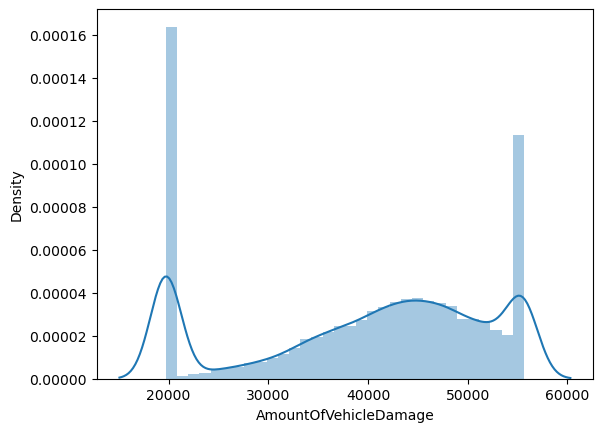

In [175]:
# distribution of "AmountOfVehicleDamage" column
sns.distplot(data_26['AmountOfVehicleDamage'])

In [176]:
data_26['InsuredAge'].value_counts()

34    1467
38    1417
37    1398
39    1365
36    1311
40    1303
35    1299
33    1292
32    1261
41    1243
43    1195
31    1191
42    1181
30    1060
44    1049
45     952
46     908
29     907
28     802
47     647
48     619
27     601
49     434
26     421
50     380
51     319
53     307
52     289
55     260
54     249
25     248
56     242
58     197
57     190
59     164
24     149
60     148
61     118
23      78
22      40
62      35
21      33
63      13
20      12
64      10
19       1
Name: InsuredAge, dtype: int64

In [177]:
data_26['InsuredAge']

0        35
1        36
2        33
3        36
4        29
         ..
28831    46
28832    44
28833    53
28834    53
28835    36
Name: InsuredAge, Length: 28805, dtype: int64

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='InsuredAge', ylabel='Density'>

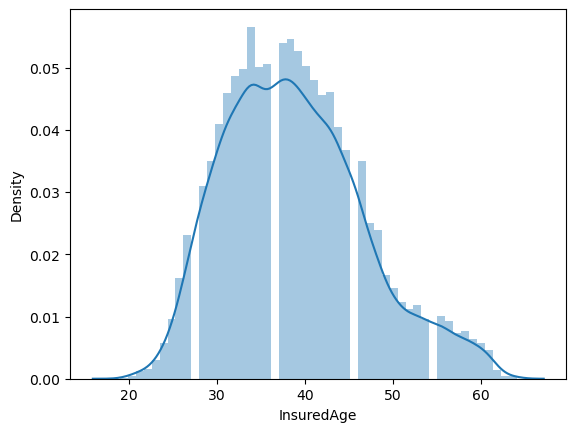

In [178]:
# Distribution of "InsuredAge" column
sns.distplot(data_26['InsuredAge'])

In [179]:
data_26['InsuredZipCode'].value_counts()

446895    100
612904     72
476198     71
440961     70
608331     70
         ... 
611322     11
459504     11
475483     11
441714     11
448984      8
Name: InsuredZipCode, Length: 995, dtype: int64

In [180]:
# Dropping "InsuredZipCode" column
data_26=data_26.drop('InsuredZipCode',axis=1)

In [181]:
data_26['InsuredEducationLevel'].value_counts()

JD             4806
High School    4575
MD             4157
Masters        4137
Associate      4119
PhD            3553
College        3458
Name: InsuredEducationLevel, dtype: int64

In [182]:
# Label encoding of "InsuredEducationLevel" column
data_26['InsuredEducationLevel']= le.fit_transform(data_26['InsuredEducationLevel'])

In [183]:
data_27=data_26
data_27.head()

,AuthoritiesContacted,IncidentState,IncidentCity,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,...,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,PropertyDamage_YES,PoliceReport_YES
0,4,4,0,17,3,1,0,65501.0,9.435368,8.711443,...,0,0,0,0,1,0,1,0,1,1
1,4,4,4,10,3,2,1,61382.0,9.435368,8.686092,...,0,0,0,0,1,0,1,0,1,1
2,3,5,5,22,1,2,3,66755.0,9.361429,9.361429,...,0,1,0,0,1,1,0,0,1,0
3,3,6,5,22,1,2,3,66243.0,9.392995,9.392995,...,0,1,0,0,1,1,0,0,1,0
4,1,5,5,10,1,2,1,53544.0,9.085910,8.886686,...,0,1,0,1,0,1,0,0,0,1


In [184]:
data_27['InsuredOccupation'].value_counts()

machine-op-inspct    2793
prof-specialty       2361
tech-support         2268
priv-house-serv      2173
exec-managerial      2145
craft-repair         2129
sales                2127
transport-moving     2079
armed-forces         2032
other-service        1963
adm-clerical         1921
protective-serv      1709
farming-fishing      1632
handlers-cleaners    1473
Name: InsuredOccupation, dtype: int64

In [185]:
# Label encoding of "InsuredOccupation" column
data_27['InsuredOccupation']= le.fit_transform(data_27['InsuredOccupation'])

In [186]:
data_28=data_27

In [187]:
data_28['InsuredHobbies'].value_counts()

bungie-jumping    1749
paintball         1687
camping           1679
kayaking          1609
exercise          1589
reading           1583
movies            1527
yachting          1486
hiking            1482
golf              1468
base-jumping      1466
video-games       1418
board-games       1395
skydiving         1395
polo              1378
cross-fit         1248
sleeping          1219
dancing           1218
chess             1207
basketball        1002
Name: InsuredHobbies, dtype: int64

In [188]:
# Label encoding of "InsuredHobbies" column
data_28['InsuredHobbies']= le.fit_transform(data_28['InsuredHobbies'])

In [189]:
data_29=data_28

In [190]:
data_29['CapitalGains'].value_counts()

0        15803
44000      141
51500      130
55600      124
75800      121
         ...  
44200       11
37500       11
43900       10
53400        9
25900        9
Name: CapitalGains, Length: 338, dtype: int64

In [191]:
data_29['CapitalGains']

0        56700
1        70600
2        66400
3        47900
4            0
         ...  
28831        0
28832        0
28833    63100
28834    67400
28835    46400
Name: CapitalGains, Length: 28805, dtype: int64

In [192]:
# max value of "CapitalGains" column
data_29['CapitalGains'].max()

100500

In [193]:
# min value of "CapitalGains" column
data_29['CapitalGains'].min()

0

In [194]:
# adding 1 to each value of "CapitalGains" column
data_29['CapitalGains']=data_29['CapitalGains']+1

In [195]:
# log transformation  of "CapitalGains" column of data_29
data_29['CapitalGains']=np.log(data_29['CapitalGains'])

In [196]:
# max value of "CapitalGains" column
data_29['CapitalGains'].max()

11.51792295668052

In [197]:
# min value of "CapitalGains" column
data_29['CapitalGains'].min()

0.0

In [198]:
# skewness of "CapitalGains" column
data_29['CapitalGains'].skew()

0.20289636577496697

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CapitalGains', ylabel='Density'>

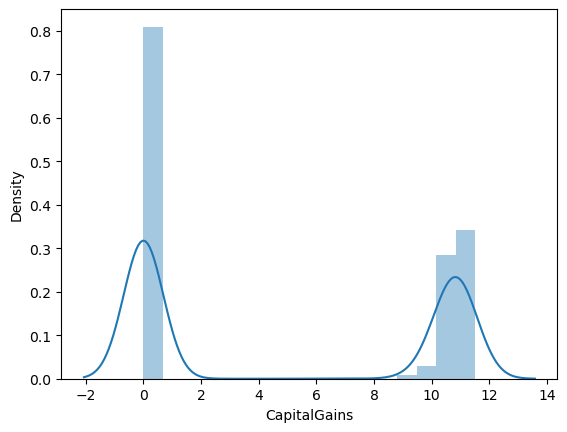

In [199]:
# distribution of "CapitalGains" column
sns.distplot(data_29['CapitalGains'])

In [200]:
# max value of "CapitalLoss" column
data_29['CapitalLoss'].max()

0

In [201]:
# min value of "CapitalLoss" column
data_29['CapitalLoss'].min()

-111100

In [202]:
data_29['CapitalLoss']

0       -48500
1       -48500
2       -63700
3       -73400
4       -41500
         ...  
28831        0
28832   -28800
28833   -43800
28834   -43800
28835   -74300
Name: CapitalLoss, Length: 28805, dtype: int64

In [203]:
data_29['CapitalLoss'].value_counts()

 0        14737
-53800      165
-31700      147
-61400      145
-53700      138
          ...  
-64900       13
-31900       13
-52900       12
-50500       12
-70200       11
Name: CapitalLoss, Length: 354, dtype: int64

In [204]:
# converting all values in "CapitalLoss" column to positive
data_29['CapitalLoss']=data_29['CapitalLoss'].abs()

# adding 1 to each value of "CapitalLoss" column
data_29['CapitalLoss']=data_29['CapitalLoss']+1

# log transformation  of "CapitalLoss" column of data_29
data_29['CapitalLoss']=np.log(data_29['CapitalLoss'])

# max value of "CapitalLoss" column
print(data_29['CapitalLoss'].max())

# min value of "CapitalLoss" column
print(data_29['CapitalLoss'].min())

11.618194976487304
0.0


In [205]:
# value counts of "CapitalLoss" column
data_29['CapitalLoss'].value_counts()

0.000000     14737
10.893047      165
10.364104      147
11.025181      145
10.891187      138
             ...  
11.080618       13
10.370393       13
10.876178       12
10.829748       12
11.159118       11
Name: CapitalLoss, Length: 354, dtype: int64

In [206]:
# skewness of "CapitalLoss" column
data_29['CapitalLoss'].skew()

0.05337837613630065

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CapitalLoss', ylabel='Density'>

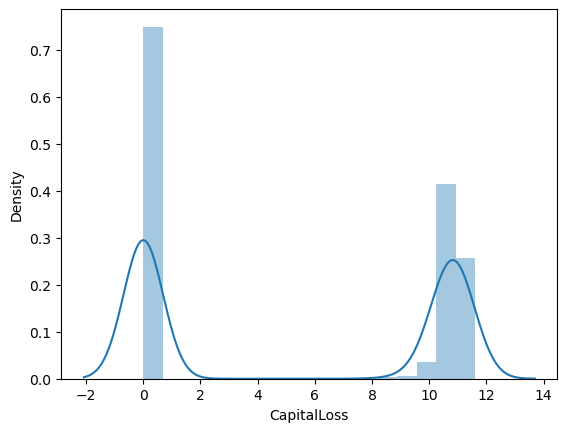

In [207]:
# distribution of "CapitalLoss" column
sns.distplot(data_29['CapitalLoss'])

In [208]:
data_30=data_29

In [209]:
data_30.shape

(28805, 44)

In [210]:
data_30['ReportedFraud'].value_counts()

N    21028
Y     7777
Name: ReportedFraud, dtype: int64

In [211]:
# Label encoding of "ReportedFraud" column
data_30['ReportedFraud']= le.fit_transform(data_30['ReportedFraud'])
data_30.head()

,AuthoritiesContacted,IncidentState,IncidentCity,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,...,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,PropertyDamage_YES,PoliceReport_YES
0,4,4,0,17,3,1,0,65501.0,9.435368,8.711443,...,0,0,0,0,1,0,1,0,1,1
1,4,4,4,10,3,2,1,61382.0,9.435368,8.686092,...,0,0,0,0,1,0,1,0,1,1
2,3,5,5,22,1,2,3,66755.0,9.361429,9.361429,...,0,1,0,0,1,1,0,0,1,0
3,3,6,5,22,1,2,3,66243.0,9.392995,9.392995,...,0,1,0,0,1,1,0,0,1,0
4,1,5,5,10,1,2,1,53544.0,9.085910,8.886686,...,0,1,0,1,0,1,0,0,0,1


In [212]:
data_30['ReportedFraud']

0        0
1        0
2        0
3        0
4        0
        ..
28831    0
28832    0
28833    0
28834    0
28835    0
Name: ReportedFraud, Length: 28805, dtype: int32

In [213]:
data_30['ReportedFraud'].value_counts()

0    21028
1     7777
Name: ReportedFraud, dtype: int64

In [214]:
data_30['InsurancePolicyNumber'].value_counts()

119121    1
142520    1
142478    1
142477    1
142475    1
         ..
130719    1
130718    1
130717    1
130716    1
119120    1
Name: InsurancePolicyNumber, Length: 28805, dtype: int64

In [215]:
data_30['InsurancePolicyNumber']

0        119121
1        119122
2        119123
3        119124
4        119125
          ...  
28831    119114
28832    119115
28833    119117
28834    119118
28835    119120
Name: InsurancePolicyNumber, Length: 28805, dtype: int64

In [216]:
# Checking any duplicate values in "InsurancePolicyNumber" column
data_30['InsurancePolicyNumber'].duplicated().sum()

0

In [217]:
# Dropping "InsurancePolicyNumber" column
data_31=data_30.drop(['InsurancePolicyNumber'],axis=1)

In [218]:
data_31['CustomerLoyaltyPeriod'].value_counts()

255    146
254    145
212    136
154    134
239    131
      ... 
4        5
1        5
3        4
477      4
479      2
Name: CustomerLoyaltyPeriod, Length: 479, dtype: int64

In [219]:
data_31['CustomerLoyaltyPeriod']

0         49
1        114
2        167
3        190
4        115
        ... 
28831    321
28832    237
28833    392
28834    391
28835    191
Name: CustomerLoyaltyPeriod, Length: 28805, dtype: int64

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CustomerLoyaltyPeriod', ylabel='Density'>

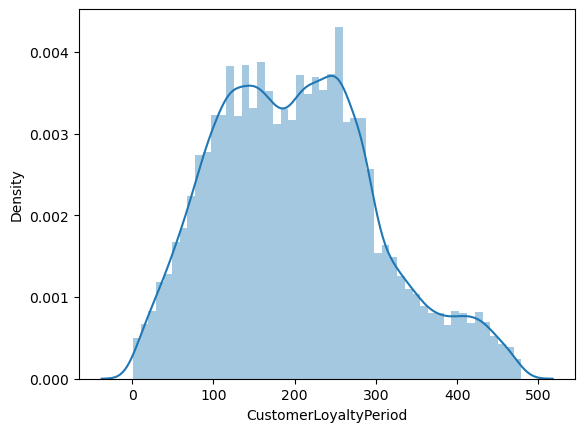

In [220]:
# Distribution of "CustomerLoyaltyPeriod" column
sns.distplot(data_31['CustomerLoyaltyPeriod'])

In [221]:
# Lowest value of "CustomerLoyaltyPeriod" column
data_31['CustomerLoyaltyPeriod'].min()

1

In [222]:
# Highest value of "CustomerLoyaltyPeriod" column
data_31['CustomerLoyaltyPeriod'].max()

479

In [223]:
# Skewness of "CustomerLoyaltyPeriod" column
data_31['CustomerLoyaltyPeriod'].skew()

0.39444553204186983

In [224]:
data_31['DateOfPolicyCoverage'].value_counts()

1998-11-11    38
1995-08-19    32
1999-05-23    28
2001-06-10    27
2005-06-17    27
              ..
2011-05-07     1
2009-03-19     1
2008-10-05     1
2008-11-18     1
1998-11-03     1
Name: DateOfPolicyCoverage, Length: 6778, dtype: int64

In [225]:
data_31['DateOfPolicyCoverage']=pd.to_datetime(data_31['DateOfPolicyCoverage'])
data_31['year_of_PolicyCoverage']=data_31['DateOfPolicyCoverage'].dt.year
data_31['month_of_PolicyCoverage']=data_31['DateOfPolicyCoverage'].dt.month
data_31['day_of_PolicyCoverage']=data_31['DateOfPolicyCoverage'].dt.day

In [226]:
# extract day of week from "DateOfPolicyCoverage" column
data_31['day_of_week_of_PolicyCoverage']=data_31['DateOfPolicyCoverage'].dt.dayofweek

# extract week of year from "DateOfPolicyCoverage" column
data_31['week_of_year_of_PolicyCoverage']=data_31['DateOfPolicyCoverage'].dt.weekofyear

# extract quarter of year from "DateOfPolicyCoverage" column
data_31['quarter_of_year_of_PolicyCoverage']=data_31['DateOfPolicyCoverage'].dt.quarter

# extract weekend or not from "DateOfPolicyCoverage" column
data_31['weekend_of_PolicyCoverage']=np.where(data_31['DateOfPolicyCoverage'].dt.dayofweek<5,0,1)

# drop "DateOfPolicyCoverage" column
data_31=data_31.drop(['DateOfPolicyCoverage'],axis=1)

data_31.head()

C:\Users\user\AppData\Local\Temp\ipykernel_7440\3356202275.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_31['week_of_year_of_PolicyCoverage']=data_31['DateOfPolicyCoverage'].dt.weekofyear


,AuthoritiesContacted,IncidentState,IncidentCity,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,...,SeverityOfIncident_Trivial Damage,PropertyDamage_YES,PoliceReport_YES,year_of_PolicyCoverage,month_of_PolicyCoverage,day_of_PolicyCoverage,day_of_week_of_PolicyCoverage,week_of_year_of_PolicyCoverage,quarter_of_year_of_PolicyCoverage,weekend_of_PolicyCoverage
0,4,4,0,17,3,1,0,65501.0,9.435368,8.711443,...,0,1,1,1998,10,25,6,43,4,1
1,4,4,4,10,3,2,1,61382.0,9.435368,8.686092,...,0,1,1,2000,11,15,2,46,4,0
2,3,5,5,22,1,2,3,66755.0,9.361429,9.361429,...,0,1,0,2001,2,12,0,7,1,0
3,3,6,5,22,1,2,3,66243.0,9.392995,9.392995,...,0,1,0,2005,4,11,0,15,2,0
4,1,5,5,10,1,2,1,53544.0,9.085910,8.886686,...,0,0,1,1996,10,25,4,43,4,0


In [227]:
data_32=data_31

In [228]:
data_32['InsurancePolicyState'].value_counts()

State3    10131
State1     9706
State2     8968
Name: InsurancePolicyState, dtype: int64

In [229]:
# One hot encoding of "InsurancePolicyState" column of data_32 with drop_first=True
data_33=pd.get_dummies(data_32,columns=['InsurancePolicyState'],drop_first=True)

In [230]:
data_33['Policy_CombinedSingleLimit'].value_counts()

250/500     8252
100/300     8041
500/1000    6992
250/300     1023
100/500      960
250/1000     952
500/500      871
500/300      867
100/1000     847
Name: Policy_CombinedSingleLimit, dtype: int64

In [231]:
data_33['Policy_CombinedSingleLimit']

0         100/300
1         100/300
2        500/1000
3        500/1000
4         100/300
           ...   
28831    500/1000
28832     100/300
28833     250/500
28834     250/500
28835    500/1000
Name: Policy_CombinedSingleLimit, Length: 28805, dtype: object

In [232]:
# total unique values of "Policy_CombinedSingleLimit" column
data_33['Policy_CombinedSingleLimit'].nunique()

9

In [233]:
# Label encoding of "Policy_CombinedSingleLimit" column
data_33['Policy_CombinedSingleLimit']= le.fit_transform(data_33['Policy_CombinedSingleLimit'])

In [234]:
data_33['Policy_Deductible'].value_counts()

500     5287
2000    5265
1000    5052
647       28
722       27
        ... 
1988       1
1776       1
1493       1
1658       1
1711       1
Name: Policy_Deductible, Length: 1496, dtype: int64

In [235]:
data_33['Policy_Deductible']

0        1000
1        1000
2         617
3         722
4         500
         ... 
28831     655
28832    1089
28833     787
28834     780
28835    2000
Name: Policy_Deductible, Length: 28805, dtype: int64

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Policy_Deductible', ylabel='Density'>

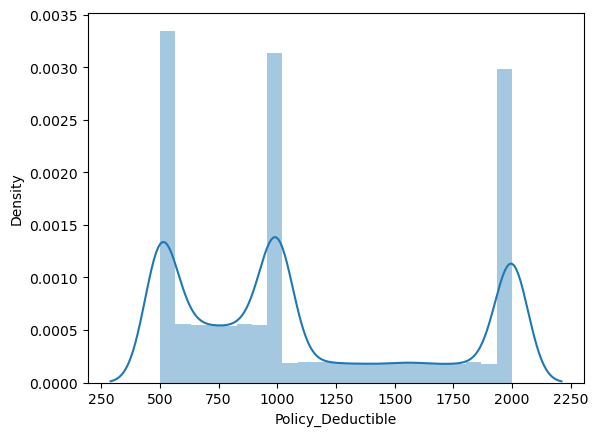

In [236]:
# distribution of "Policy_Deductible" column
sns.distplot(data_33['Policy_Deductible'])

In [237]:
# skewness of "Policy_Deductible" column
data_33['Policy_Deductible'].skew()

0.5675191371781994

In [238]:
data_33['PolicyAnnualPremium'].value_counts()

-1.00       141
 1310.77      7
 1310.78      6
 1334.47      5
 1315.68      5
           ... 
 1391.22      1
 1130.15      1
 1116.97      1
 1115.44      1
 928.43       1
Name: PolicyAnnualPremium, Length: 23827, dtype: int64

In [239]:
data_33['PolicyAnnualPremium']

0        1632.73
1        1255.19
2        1373.38
3        1337.60
4        1353.73
          ...   
28831    1276.01
28832    1273.38
28833    1380.92
28834    1389.29
28835     928.43
Name: PolicyAnnualPremium, Length: 28805, dtype: float64

2047.59
-1.0
1255.5455761152498
1265.22
0   -1.0
Name: PolicyAnnualPremium, dtype: float64
-0.796342363769351


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PolicyAnnualPremium', ylabel='Density'>

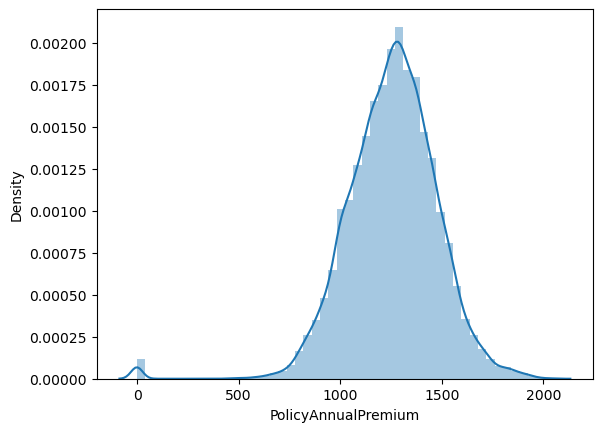

In [240]:
# max value of "PolicyAnnualPremium" column
print(data_33['PolicyAnnualPremium'].max())

# min value of "PolicyAnnualPremium" column
print(data_33['PolicyAnnualPremium'].min())

# mean value of "PolicyAnnualPremium" column
print(data_33['PolicyAnnualPremium'].mean())

# median value of "PolicyAnnualPremium" column
print(data_33['PolicyAnnualPremium'].median())

# mode value of "PolicyAnnualPremium" column
print(data_33['PolicyAnnualPremium'].mode())

# skewness of "PolicyAnnualPremium" column
print(data_33['PolicyAnnualPremium'].skew())

# distribution of "PolicyAnnualPremium" column
sns.distplot(data_33['PolicyAnnualPremium'])

In [241]:
upper_limit = data_33['PolicyAnnualPremium'].mean() + 3*data_33['PolicyAnnualPremium'].std()
lower_limit = data_33['PolicyAnnualPremium'].mean() - 3*data_33['PolicyAnnualPremium'].std()

data_33['PolicyAnnualPremium'] = np.where(
    data_33['PolicyAnnualPremium']>upper_limit,
    upper_limit,
    np.where(
        data_33['PolicyAnnualPremium']<lower_limit,
        lower_limit,
        data_33['PolicyAnnualPremium']
    )
)

# skewwness
print(data_33['PolicyAnnualPremium'].skew())

-0.10426540655860736


c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PolicyAnnualPremium', ylabel='Density'>

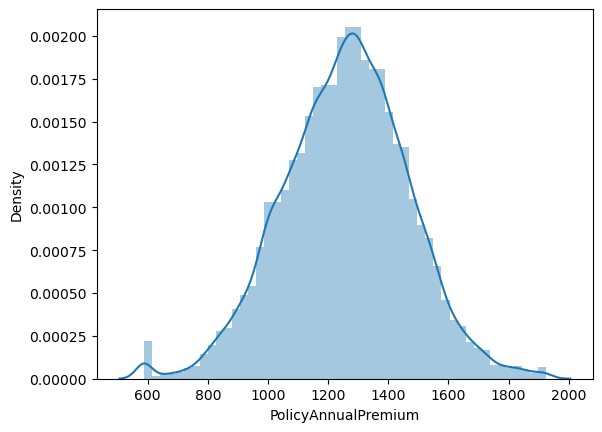

In [242]:
# distribution of "PolicyAnnualPremium" column
sns.distplot(data_33['PolicyAnnualPremium'])

In [243]:
data_34=data_33

In [244]:
data_34['PolicyAnnualPremium']

0        1632.73
1        1255.19
2        1373.38
3        1337.60
4        1353.73
          ...   
28831    1276.01
28832    1273.38
28833    1380.92
28834    1389.29
28835     928.43
Name: PolicyAnnualPremium, Length: 28805, dtype: float64

In [245]:
data_34['UmbrellaLimit'].value_counts()

0          21050
6000000      313
5000000      139
7000000      115
4000000       71
           ...  
3356801        1
3238362        1
5094033        1
1258837        1
2909175        1
Name: UmbrellaLimit, Length: 7081, dtype: int64

In [246]:
# checking any negative values in "UmbrellaLimit" column
data_34['UmbrellaLimit'].lt(0).sum()

34

In [247]:
# put the negative values in "UmbrellaLimit" column in a new dataframe
af= data_34[data_34['UmbrellaLimit']<0]

In [248]:
af['UmbrellaLimit']

1004     -575498
1737     -896857
2410    -1000000
2699     -124178
5803     -292456
6445     -605542
8063     -582952
8064     -188081
8065     -934826
8066     -132525
11436    -139072
11437     -21422
11438    -396801
14708    -902278
14709    -298077
14710    -347594
14712    -712263
14713    -660200
17206    -917296
20261    -281076
20263    -211695
20264    -552043
20265    -495724
20267    -559181
20268    -762000
21061    -855720
21064    -872859
21067    -843740
22868    -994831
22871    -339789
22872    -189126
24191    -246568
27605    -959396
28770    -180016
Name: UmbrellaLimit, dtype: int64

In [249]:
# converting negative values to positive values in "UmbrellaLimit" column
data_34['UmbrellaLimit']=data_34['UmbrellaLimit'].abs()

In [250]:
data_35=data_34

In [251]:
# Encoding of "UmbrellaLimit" column as 0 and 1. If any value is greater than 0 , encode as 1 ; otherwise encode as 0

data_35['UmbrellaLimit']=data_35['UmbrellaLimit'].apply(lambda x: 1 if x>0 else 0)

data_35['UmbrellaLimit'].value_counts()

0    21050
1     7755
Name: UmbrellaLimit, dtype: int64

In [252]:
data_35.head()

,AuthoritiesContacted,IncidentState,IncidentCity,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,...,PoliceReport_YES,year_of_PolicyCoverage,month_of_PolicyCoverage,day_of_PolicyCoverage,day_of_week_of_PolicyCoverage,week_of_year_of_PolicyCoverage,quarter_of_year_of_PolicyCoverage,weekend_of_PolicyCoverage,InsurancePolicyState_State2,InsurancePolicyState_State3
0,4,4,0,17,3,1,0,65501.0,9.435368,8.711443,...,1,1998,10,25,6,43,4,1,0,0
1,4,4,4,10,3,2,1,61382.0,9.435368,8.686092,...,1,2000,11,15,2,46,4,0,0,0
2,3,5,5,22,1,2,3,66755.0,9.361429,9.361429,...,0,2001,2,12,0,7,1,0,0,1
3,3,6,5,22,1,2,3,66243.0,9.392995,9.392995,...,0,2005,4,11,0,15,2,0,1,0
4,1,5,5,10,1,2,1,53544.0,9.085910,8.886686,...,1,1996,10,25,4,43,4,0,1,0


In [253]:
data_35['InsuredRelationship'].value_counts()

own-child         5235
not-in-family     5216
other-relative    5149
husband           4998
wife              4220
unmarried         3987
Name: InsuredRelationship, dtype: int64

In [254]:
# Label encoding of "InsuredRelationship" column
data_35['InsuredRelationship']= le.fit_transform(data_35['InsuredRelationship'])

In [255]:
data_36=data_35

In [256]:
data_36.shape

(28805, 50)

In [257]:
data_36.iloc[:,:20].head()

,AuthoritiesContacted,IncidentState,IncidentCity,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,ReportedFraud,CustomerLoyaltyPeriod
0,4,4,0,17,3,1,0,65501.0,9.435368,8.711443,46013.0,35,1,3,1,12,10.945547,10.789340,0,49
1,4,4,4,10,3,2,1,61382.0,9.435368,8.686092,39903.0,36,1,3,12,6,11.164800,10.789340,0,114
2,3,5,5,22,1,2,3,66755.0,9.361429,9.361429,43495.0,33,1,3,1,14,11.103467,11.061956,0,167
3,3,6,5,22,1,2,3,66243.0,9.392995,9.392995,42237.0,36,1,3,1,14,10.776892,11.203693,0,190
4,1,5,5,10,1,2,1,53544.0,9.085910,8.886686,37481.0,29,0,2,3,7,0.000000,10.633473,0,115


In [258]:
data_36.iloc[:,20:40].head()

,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleMake,VehicleYOM,month_of_incident,day_of_incident,day_of_week_of_incident,weekend_of_incident,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,PropertyDamage_YES
0,1,1000,1632.73,0,1,1,13,2,3,1,0,0,0,0,0,1,0,1,0,1
1,1,1000,1255.19,0,1,1,11,2,2,0,0,0,0,0,0,1,0,1,0,1
2,6,617,1373.38,0,5,13,4,1,15,3,0,0,1,0,0,1,1,0,0,1
3,6,722,1337.60,0,3,13,8,1,19,0,0,0,1,0,0,1,1,0,0,1
4,1,500,1353.73,1,4,12,15,1,9,4,0,0,1,0,1,0,1,0,0,0


In [259]:
data_36.iloc[:,40:60].head()

,PoliceReport_YES,year_of_PolicyCoverage,month_of_PolicyCoverage,day_of_PolicyCoverage,day_of_week_of_PolicyCoverage,week_of_year_of_PolicyCoverage,quarter_of_year_of_PolicyCoverage,weekend_of_PolicyCoverage,InsurancePolicyState_State2,InsurancePolicyState_State3
0,1,1998,10,25,6,43,4,1,0,0
1,1,2000,11,15,2,46,4,0,0,0
2,0,2001,2,12,0,7,1,0,0,1
3,0,2005,4,11,0,15,2,0,1,0
4,1,1996,10,25,4,43,4,0,1,0


In [260]:
data_36.iloc[:,:20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28805 entries, 0 to 28835
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AuthoritiesContacted   28805 non-null  int32  
 1   IncidentState          28805 non-null  int32  
 2   IncidentCity           28805 non-null  int32  
 3   IncidentTime           28805 non-null  int64  
 4   NumberOfVehicles       28805 non-null  int64  
 5   BodilyInjuries         28805 non-null  int64  
 6   Witnesses              28805 non-null  int32  
 7   AmountOfTotalClaim     28805 non-null  float64
 8   AmountOfInjuryClaim    28805 non-null  float64
 9   AmountOfPropertyClaim  28805 non-null  float64
 10  AmountOfVehicleDamage  28805 non-null  float64
 11  InsuredAge             28805 non-null  int64  
 12  InsuredGender          28805 non-null  int32  
 13  InsuredEducationLevel  28805 non-null  int32  
 14  InsuredOccupation      28805 non-null  int32  
 15  In

In [261]:
data_36.iloc[:,20:40].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28805 entries, 0 to 28835
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Policy_CombinedSingleLimit               28805 non-null  int32  
 1   Policy_Deductible                        28805 non-null  int64  
 2   PolicyAnnualPremium                      28805 non-null  float64
 3   UmbrellaLimit                            28805 non-null  int64  
 4   InsuredRelationship                      28805 non-null  int32  
 5   VehicleMake                              28805 non-null  int32  
 6   VehicleYOM                               28805 non-null  int32  
 7   month_of_incident                        28805 non-null  int64  
 8   day_of_incident                          28805 non-null  int64  
 9   day_of_week_of_incident                  28805 non-null  int64  
 10  weekend_of_incident                      28805

In [262]:
data_36.iloc[:,40:60].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28805 entries, 0 to 28835
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   PoliceReport_YES                   28805 non-null  uint8
 1   year_of_PolicyCoverage             28805 non-null  int64
 2   month_of_PolicyCoverage            28805 non-null  int64
 3   day_of_PolicyCoverage              28805 non-null  int64
 4   day_of_week_of_PolicyCoverage      28805 non-null  int64
 5   week_of_year_of_PolicyCoverage     28805 non-null  int64
 6   quarter_of_year_of_PolicyCoverage  28805 non-null  int64
 7   weekend_of_PolicyCoverage          28805 non-null  int32
 8   InsurancePolicyState_State2        28805 non-null  uint8
 9   InsurancePolicyState_State3        28805 non-null  uint8
dtypes: int32(1), int64(6), uint8(3)
memory usage: 1.7 MB


In [263]:
from sklearn.preprocessing import StandardScaler

In [264]:
# put all the columns except "ReportedFraud" in "z" variable
z=data_36.drop(['ReportedFraud'],axis=1)

# put "ReportedFraud" column in "target" variable
target=data_36['ReportedFraud']

# standardization of "z" variable
z=StandardScaler().fit_transform(z)

In [265]:
print(z)

[[ 1.20962717  0.24410359 -1.44383662 ...  1.56978383 -0.67237228
  -0.7365589 ]
 [ 1.20962717  0.24410359  0.53764027 ... -0.63703038 -0.67237228
  -0.7365589 ]
 [ 0.55697183  0.80526911  1.03300949 ... -0.63703038 -0.67237228
   1.35766468]
 ...
 [-0.74833885  1.36643463  1.52837871 ... -0.63703038 -0.67237228
   1.35766468]
 [-1.40099419  1.36643463 -0.45309817 ... -0.63703038 -0.67237228
   1.35766468]
 [ 0.55697183  0.80526911 -0.45309817 ...  1.56978383  1.4872713
  -0.7365589 ]]


In [266]:
# convert z to a dataframe
ff=pd.DataFrame(z)

In [267]:
ff.iloc[:,:20].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.209627,0.244104,-1.443837,0.851542,1.200606,0.017915,-1.430608,0.602373,1.228992,-0.118499,0.504322,-0.477216,1.090640,0.013581,-1.394777,0.422859,1.132519,1.023846,-1.541783,-1.289638
1,1.209627,0.244104,0.537640,-0.286898,1.200606,1.292126,-0.469719,0.358915,1.228992,-0.164769,-0.000901,-0.352182,1.090640,0.013581,1.338745,-0.631422,1.173349,1.023846,-0.891407,-1.289638
2,0.556972,0.805269,1.033009,1.664714,-0.840077,1.292126,1.452057,0.676493,1.086051,1.067828,0.296114,-0.727283,1.090640,0.013581,-1.394777,0.774287,1.161928,1.074373,-0.361100,0.912300
3,0.556972,1.366435,1.033009,1.664714,-0.840077,1.292126,1.452057,0.646230,1.147076,1.125441,0.192092,-0.352182,1.090640,0.013581,-1.394777,0.774287,1.101111,1.100643,-0.130967,0.912300
4,-0.748339,0.805269,1.033009,-0.286898,-0.840077,1.292126,-0.469719,-0.104360,0.553410,0.201346,-0.201171,-1.227418,-0.916893,-0.502527,-0.897773,-0.455708,-0.905831,0.994957,-0.881401,-1.289638


In [268]:
ff.iloc[:,20:40].head()

,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-0.209070,1.782936,-0.606967,-0.819862,-1.362568,0.547396,0.978250,-1.579656,-1.011959,-0.624608,-0.308621,-0.824849,-0.320353,-0.750859,1.410759,-0.751085,1.584103,-0.311245,1.046233,1.048493
1,-0.209070,-0.015393,-0.606967,-0.819862,-1.362568,0.170808,0.978250,-1.711164,-1.516703,-0.624608,-0.308621,-0.824849,-0.320353,-0.750859,1.410759,-0.751085,1.584103,-0.311245,1.046233,1.048493
2,-0.909650,0.547579,-0.606967,1.573948,1.596402,-1.147250,-0.959348,-0.001566,-0.002471,-0.624608,-0.308621,1.212343,-0.320353,-0.750859,1.410759,1.331407,-0.631272,-0.311245,1.046233,-0.953750
3,-0.717585,0.377149,-0.606967,0.377043,1.596402,-0.394074,-0.959348,0.524464,-1.516703,-0.624608,-0.308621,1.212343,-0.320353,-0.750859,1.410759,1.331407,-0.631272,-0.311245,1.046233,-0.953750
4,-1.123665,0.453981,1.647537,0.975495,1.349821,0.923984,-0.959348,-0.790611,0.502273,-0.624608,-0.308621,1.212343,-0.320353,1.331808,-0.708838,1.331407,-0.631272,-0.311245,-0.955810,1.048493


In [269]:
ff.iloc[:,40:60].head()

,40,41,42,43,44,45,46,47,48
0,-0.534377,1.097703,1.241924,1.497154,1.187173,1.406392,1.569784,-0.672372,-0.736559
1,-0.229679,1.416472,-0.058297,-0.495961,1.405717,1.406392,-0.637030,-0.672372,-0.736559
2,-0.077330,-1.452449,-0.448363,-1.492518,-1.435355,-1.440622,-0.637030,-0.672372,1.357665
3,0.532066,-0.814911,-0.578385,-1.492518,-0.852571,-0.491618,-0.637030,1.487271,-0.736559
4,-0.839075,1.097703,1.241924,0.500597,1.187173,1.406392,-0.637030,1.487271,-0.736559


In [270]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: ReportedFraud, dtype: int32

In [271]:
target.value_counts()

0    21028
1     7777
Name: ReportedFraud, dtype: int64

In [272]:
predf=pd.concat([ff,target],axis=1)

In [273]:
predf.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,ReportedFraud
0,1.209627,0.244104,-1.443837,0.851542,1.200606,0.017915,-1.430608,0.602373,1.228992,-0.118499,...,-0.534377,1.097703,1.241924,1.497154,1.187173,1.406392,1.569784,-0.672372,-0.736559,0.0
1,1.209627,0.244104,0.537640,-0.286898,1.200606,1.292126,-0.469719,0.358915,1.228992,-0.164769,...,-0.229679,1.416472,-0.058297,-0.495961,1.405717,1.406392,-0.637030,-0.672372,-0.736559,0.0
2,0.556972,0.805269,1.033009,1.664714,-0.840077,1.292126,1.452057,0.676493,1.086051,1.067828,...,-0.077330,-1.452449,-0.448363,-1.492518,-1.435355,-1.440622,-0.637030,-0.672372,1.357665,0.0
3,0.556972,1.366435,1.033009,1.664714,-0.840077,1.292126,1.452057,0.646230,1.147076,1.125441,...,0.532066,-0.814911,-0.578385,-1.492518,-0.852571,-0.491618,-0.637030,1.487271,-0.736559,0.0
4,-0.748339,0.805269,1.033009,-0.286898,-0.840077,1.292126,-0.469719,-0.104360,0.553410,0.201346,...,-0.839075,1.097703,1.241924,0.500597,1.187173,1.406392,-0.637030,1.487271,-0.736559,0.0


In [274]:
predf.shape

(28836, 50)

In [275]:
# checking any missing values in "predf" dataframe
predf.isnull().sum()[predf.isnull().sum()>0]

0                31
1                31
2                31
3                31
4                31
5                31
6                31
7                31
8                31
9                31
10               31
11               31
12               31
13               31
14               31
15               31
16               31
17               31
18               31
19               31
20               31
21               31
22               31
23               31
24               31
25               31
26               31
27               31
28               31
29               31
30               31
31               31
32               31
33               31
34               31
35               31
36               31
37               31
38               31
39               31
40               31
41               31
42               31
43               31
44               31
45               31
46               31
47               31
48               31
ReportedFraud    31


In [276]:
# dropping the missing values in "predf" dataframe
predf=predf.dropna()

In [277]:
# shape of "predf" dataframe
predf.shape

(28774, 50)

In [278]:
from sklearn.model_selection import train_test_split

X = predf.drop('ReportedFraud',axis=1)

y = predf['ReportedFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=500)

In [279]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)

rfc_pred = rfc.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      6312
         1.0       0.74      0.50      0.60      2321

    accuracy                           0.82      8633
   macro avg       0.79      0.72      0.74      8633
weighted avg       0.81      0.82      0.81      8633



In [280]:
# tuning the hyperparameters of random forest classifier

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

rfc = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

grid_search.best_params_

grid_search.best_score_

print (classification_report(y_test,grid_search.predict(X_test)))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88      6312
         1.0       0.77      0.41      0.54      2321

    accuracy                           0.81      8633
   macro avg       0.79      0.68      0.71      8633
weighted avg       0.80      0.81      0.79      8633



In [281]:
# logistic regression
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

log_pred = logmodel.predict(X_test)

print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.92      0.84      6312
         1.0       0.56      0.27      0.36      2321

    accuracy                           0.75      8633
   macro avg       0.67      0.60      0.60      8633
weighted avg       0.72      0.75      0.71      8633



In [282]:
# Decision tree classifier

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

dtree_pred = dtree.predict(X_test)

print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80      6312
         1.0       0.46      0.49      0.48      2321

    accuracy                           0.71      8633
   macro avg       0.64      0.64      0.64      8633
weighted avg       0.72      0.71      0.71      8633



In [1135]:

# import xgboost classifier

from xgboost import XGBClassifier

# create an instance of xgboost classifier

xgb=XGBClassifier(n_estimators=10)

# fit the model

xgb.fit(X_train,y_train)

# predict the model

y_pred=xgb.predict(X_test)

# import classification report

from sklearn.metrics import classification_report

# print classification report

print(classification_report(y_test,y_pred))


c:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:13:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87      6312
         1.0       0.70      0.42      0.53      2321

    accuracy                           0.80      8633
   macro avg       0.76      0.68      0.70      8633
weighted avg       0.78      0.80      0.78      8633



In [1136]:
# Tuning the model using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create a dictionary of parameters
param_grid={'n_estimators':[50,100],'max_depth':[3,7],'learning_rate':[0.1,0.001],'gamma':[0,0.2]}

# Create an instance of GridSearchCV
grid=GridSearchCV(XGBClassifier(),param_grid,verbose=3,n_jobs=-1)

# Fit the model
grid.fit(X_train,y_train)

# Predict the model
grid_pred=grid.predict(X_test)

# Print classification report
print(classification_report(y_test,grid_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:18:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      6312
         1.0       0.74      0.52      0.61      2321

    accuracy                           0.82      8633
   macro avg       0.79      0.73      0.75      8633
weighted avg       0.81      0.82      0.81      8633



In [1137]:
grid.best_params_

{'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

In [1138]:
# svm

from sklearn.svm import SVC

# create an instance of svm
svm=SVC()

# fit the model
svm.fit(X_train,y_train)

# predict the model
svm_pred=svm.predict(X_test)

# print classification report
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      6312
         1.0       0.75      0.52      0.61      2321

    accuracy                           0.82      8633
   macro avg       0.80      0.73      0.75      8633
weighted avg       0.82      0.82      0.81      8633



In [1139]:
# Using PCA to reduce the dimensionality of the data
from sklearn.decomposition import PCA

# Creating an instance of PCA
pca=PCA(n_components=6)

# fit and transform the data
principalComponents=pca.fit_transform(z)

# Convert the principalComponents to dataframe
principalDf=pd.DataFrame(data=principalComponents,columns=['pc1','pc2','pc3','pc4','pc5','pc6'])

# Concat the "principalDf" and "target" dataframe
finaldf=pd.concat([principalDf,target],axis=1)

# Head of finalDf
finaldf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,ReportedFraud
0,-1.557496,-2.328336,-1.733059,0.348929,1.961037,2.038527,0.0
1,-1.126756,-2.690745,-1.196086,-1.963934,0.181783,1.805477,0.0
2,-1.366110,2.445694,0.000250,-1.360505,-0.434926,-0.334797,0.0
3,-1.388622,1.455058,0.069810,-1.982260,0.220106,-1.119832,0.0
4,-0.291905,-1.649120,-1.346339,0.411909,-0.142003,-2.349785,0.0


In [1140]:
finaldf.shape

(28836, 7)

In [1141]:
finaldf.isnull().sum()[finaldf.isnull().sum()>0]

pc1              31
pc2              31
pc3              31
pc4              31
pc5              31
pc6              31
ReportedFraud    31
dtype: int64

In [1142]:
# dropping the missing values in "finaldf" dataframe
finaldf=finaldf.dropna()

In [1143]:
finaldf.isnull().sum()[finaldf.isnull().sum()>0]

Series([], dtype: int64)

In [1144]:
from sklearn.model_selection import train_test_split

X = finaldf.drop('ReportedFraud',axis=1)

y = finaldf['ReportedFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=500)

In [1145]:
# create an instance of xgboost classifier
xgb=XGBClassifier(n_estimators=10)

# fit the model
xgb.fit(X_train,y_train)

# predict the model
y_pred=xgb.predict(X_test)

# import classification report
from sklearn.metrics import classification_report

# print classification report
print(classification_report(y_test,y_pred))

c:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:21:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84      6312
         1.0       0.60      0.02      0.03      2321

    accuracy                           0.73      8633
   macro avg       0.67      0.51      0.44      8633
weighted avg       0.70      0.73      0.63      8633



# By using variuous model, I have got the best accuracy of 0.82 using Random Forest Classifier, XGBoost Classifier and SVM Classifier. In the three model, I got the same accuracy. But in SVM I got the highest f1-score of 0.89